In [1]:
pip install google-cloud-bigquery pandas pandas-gbq pyarrow


Note: you may need to restart the kernel to use updated packages.


In [2]:
from google.cloud import bigquery
client = bigquery.Client()
print("BigQuery Client Initialized Successfully!")


BigQuery Client Initialized Successfully!


In [3]:
import pandas as pd

# Define file paths (Modify as per your dataset location)
file_paths = {
    "customers": "olist_customers_dataset.csv",
    "geolocation": "olist_geolocation_dataset.csv",
    "order_items": "olist_order_items_dataset.csv",
    "order_payments": "olist_order_payments_dataset.csv",
    "order_reviews": "olist_order_reviews_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "products": "olist_products_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "category_translation": "product_category_name_translation.csv"
}

# Load data into Pandas DataFrames
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Preview data
dfs["customers"].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [18]:
from google.cloud import bigquery
import pandas as pd

# Initialize BigQuery Client
client = bigquery.Client()

# Define dataset
dataset_id = "data-warehouse-ecommerce.ecom"  # Replace with your project ID

# Function to load CSV into BigQuery
def load_csv_to_bq(csv_path, table_name):
    df = pd.read_csv(csv_path)
    
    table_id = f"{dataset_id}.{table_name}"
    
    job = client.load_table_from_dataframe(df, table_id)
    job.result()  # Wait for the job to complete
    print(f" Loaded {csv_path} into {table_id}")

# Load all tables
load_csv_to_bq("olist_customers_dataset.csv", "staging_customers")
load_csv_to_bq("olist_orders_dataset.csv", "staging_orders")
load_csv_to_bq("olist_order_items_dataset.csv", "staging_order_items")
load_csv_to_bq("olist_products_dataset.csv", "staging_products")
load_csv_to_bq("olist_sellers_dataset.csv", "staging_sellers")
load_csv_to_bq("olist_order_payments_dataset.csv", "staging_payments")
load_csv_to_bq("olist_order_reviews_dataset.csv", "staging_reviews")


 Loaded olist_customers_dataset.csv into data-warehouse-ecommerce.ecom.staging_customers
 Loaded olist_orders_dataset.csv into data-warehouse-ecommerce.ecom.staging_orders
 Loaded olist_order_items_dataset.csv into data-warehouse-ecommerce.ecom.staging_order_items
 Loaded olist_products_dataset.csv into data-warehouse-ecommerce.ecom.staging_products
 Loaded olist_sellers_dataset.csv into data-warehouse-ecommerce.ecom.staging_sellers
 Loaded olist_order_payments_dataset.csv into data-warehouse-ecommerce.ecom.staging_payments
 Loaded olist_order_reviews_dataset.csv into data-warehouse-ecommerce.ecom.staging_reviews


In [19]:
def run_query(query):
    """Executes the given SQL query and returns results as a Pandas DataFrame"""
    query_job = client.query(query)
    return query_job.to_dataframe()

In [20]:
# Install required libraries (if not installed)
!pip install pandas google-cloud-bigquery seaborn matplotlib

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

In [23]:
# Authenticate Google BigQuery (Ensure you've set up authentication)
client = bigquery.Client(project="data-warehouse-ecommerce")

# Set dataset ID
dataset_id = "data-warehouse-ecommerce.ecom"


In [24]:
def run_query(query):
    """Executes the given SQL query and returns results as a Pandas DataFrame"""
    query_job = client.query(query)
    return query_job.to_dataframe()


C:\anaconda\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


    customer_city  total_orders
0       sao paulo         18590
1  rio de janeiro          8202
2  belo horizonte          3247
3        brasilia          2457
4        curitiba          1809


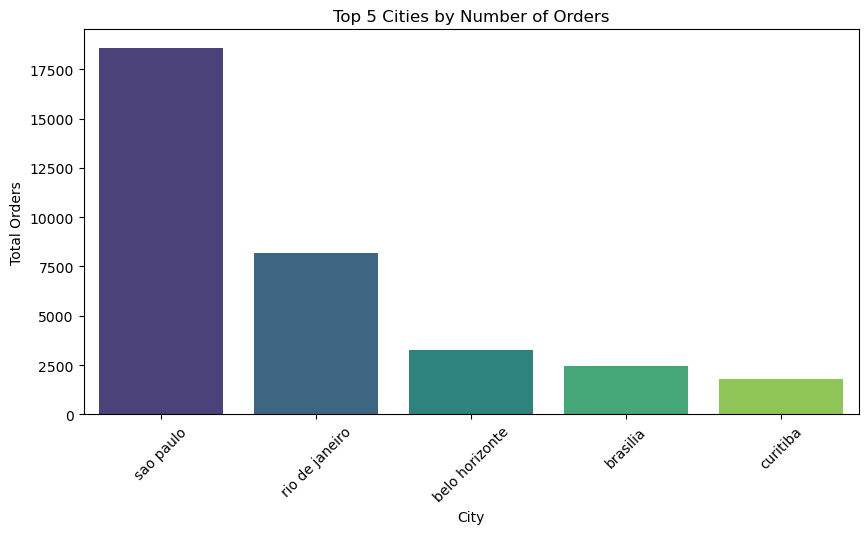

In [33]:
# top 5 cities in terms of Orders
query1 = f"""
SELECT 
    c.customer_city,
    COUNT(o.order_id) AS total_orders
FROM `data-warehouse-ecommerce.ecom.fact_orders` AS o
JOIN `data-warehouse-ecommerce.ecom.dim_customers` AS c
    ON o.customer_key = c.customer_key  -- Using the correct key
GROUP BY c.customer_city
ORDER BY total_orders DESC
LIMIT 5;
"""

query_job = client.query(query1)
df = query_job.to_dataframe()

# Displaying tabular output
print(df)

# Visualization: Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=df["customer_city"], y=df["total_orders"], palette="viridis")
plt.xlabel("City")
plt.ylabel("Total Orders")
plt.title("Top 5 Cities by Number of Orders")
plt.xticks(rotation=45)
plt.show()


C:\anaconda\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


    product_category_name  total_sales
0         cama_mesa_banho        17268
1        moveis_decoracao        15402
2            beleza_saude        12873
3  informatica_acessorios        12292
4   utilidades_domesticas        11677


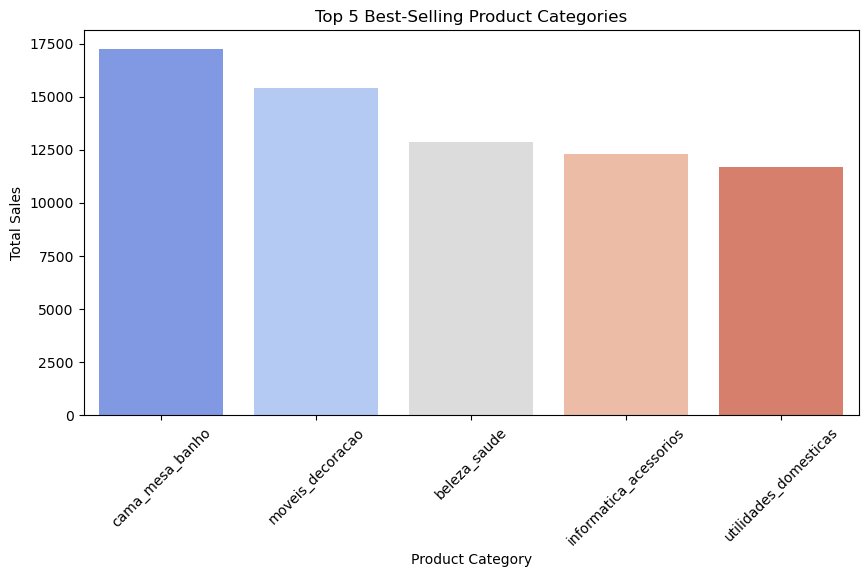

In [40]:
# best selling product categories
query2 = f"""
SELECT 
    dp.product_category_name,
    COUNT(oi.order_id) AS total_sales
FROM `data-warehouse-ecommerce.ecom.fact_orders` AS fo
JOIN `data-warehouse-ecommerce.ecom.staging_order_items` AS oi 
    ON fo.order_id = oi.order_id
JOIN `data-warehouse-ecommerce.ecom.dim_products` AS dp
    ON oi.product_id = dp.product_id
GROUP BY dp.product_category_name
ORDER BY total_sales DESC
LIMIT 5;
"""

query_job = client.query(query2)
df2 = query_job.to_dataframe()

# Displaying tabular output
print(df2)

# Visualization: Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=df2["product_category_name"], y=df2["total_sales"], palette="coolwarm")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Top 5 Best-Selling Product Categories")
plt.xticks(rotation=45)
plt.show()



C:\anaconda\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


    order_year  order_month  total_revenue
0         2016            9         132.39
1         2016           10       50942.23
2         2016           12          10.90
3         2017            1      128637.99
4         2017            2      260753.86
5         2017            3      396451.04
6         2017            4      391784.42
7         2017            5      545340.65
8         2017            6      453031.41
9         2017            7      533616.84
10        2017            8      601409.67
11        2017            9      662276.39
12        2017           10      693807.60
13        2017           11     1046127.84
14        2017           12      770656.15
15        2018            1      987151.41
16        2018            2      880099.79
17        2018            3     1025936.06
18        2018            4     1029472.30
19        2018            5     1032150.44
20        2018            6      909221.10
21        2018            7      925302.46
22        2

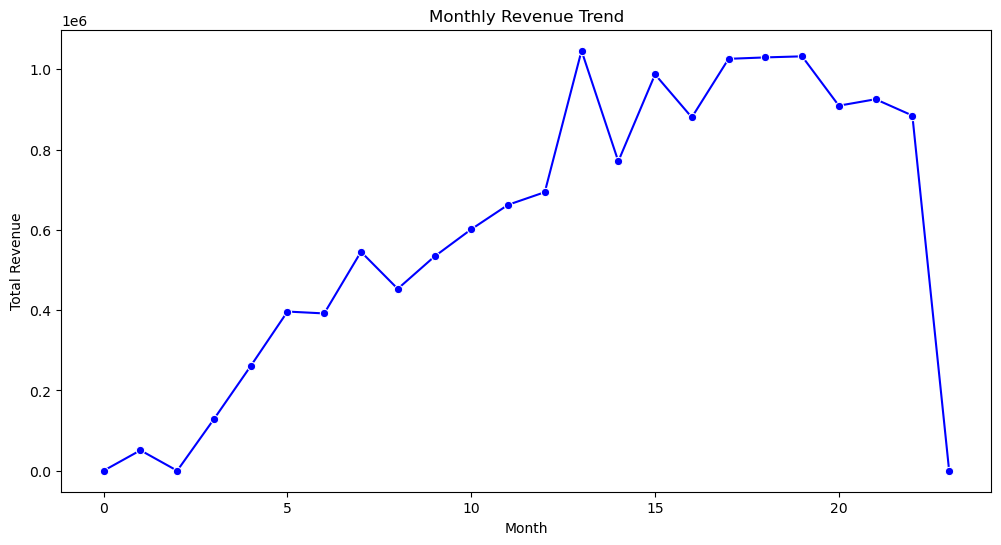

In [52]:
# Monthly Revenue Trend
query3 = """
SELECT 
    EXTRACT(YEAR FROM PARSE_TIMESTAMP('%m/%d/%Y %H:%M', fo.order_purchase_timestamp)) AS order_year,
    EXTRACT(MONTH FROM PARSE_TIMESTAMP('%m/%d/%Y %H:%M', fo.order_purchase_timestamp)) AS order_month,
    SUM(fo.total_price) AS total_revenue
FROM `data-warehouse-ecommerce.ecom.fact_orders` AS fo
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
"""

query_job = client.query(query3)
df3 = query_job.to_dataframe()

# Displaying tabular output
print(df3)  # <-- Corrected this from 'df' to 'df3'

# Visualization: Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=df3.index, y=df3["total_revenue"], marker="o", color="b")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend")
plt.show()



C:\anaconda\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


   customer_state  avg_customer_lifetime_value
0              PB                   232.568308
1              AC                   210.610370
2              AL                   202.214988
3              TO                   201.619749
4              AP                   200.798529
5              RN                   196.171266
6              RO                   190.137773
7              PA                   190.111216
8              MT                   189.171694
9              PI                   186.952738
10             CE                   180.420678
11             SE                   176.680000
12             RR                   170.205000
13             MS                   169.003399
14             MA                   166.056473
15             PE                   164.598519
16             BA                   161.230256
17             AM                   155.165714
18             GO                   154.376791
19             RJ                   149.942341
20           

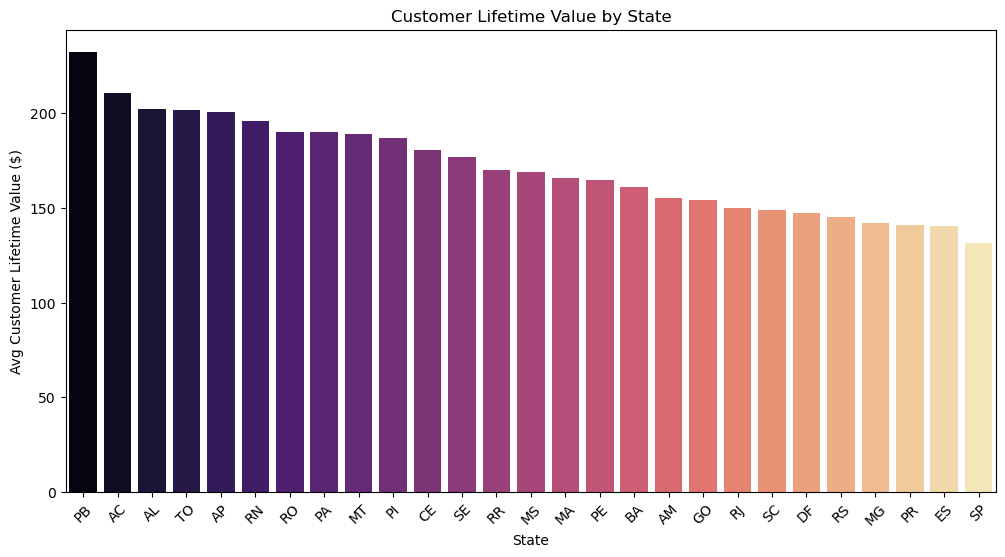

In [45]:

#Customer Lifetime Value (CLV) by State
query = """
SELECT 
    dc.customer_state,
    SUM(fo.total_price) / COUNT(DISTINCT fo.customer_key) AS avg_customer_lifetime_value
FROM `data-warehouse-ecommerce.ecom.fact_orders` AS fo
JOIN `data-warehouse-ecommerce.ecom.dim_customers` AS dc
    ON fo.customer_key = dc.customer_key
GROUP BY dc.customer_state
ORDER BY avg_customer_lifetime_value DESC;
"""
query_job = client.query(query)
df = query_job.to_dataframe()

# Displaying tabular output
print(df)

# Visualization: Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=df["customer_state"], y=df["avg_customer_lifetime_value"], palette="magma")
plt.xlabel("State")
plt.ylabel("Avg Customer Lifetime Value ($)")
plt.title("Customer Lifetime Value by State")
plt.xticks(rotation=45)
plt.show()


C:\anaconda\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


  payment_type  total_transactions
0  credit_card               90933
1      voucher               23923
2       boleto               22867
3   debit_card                1694


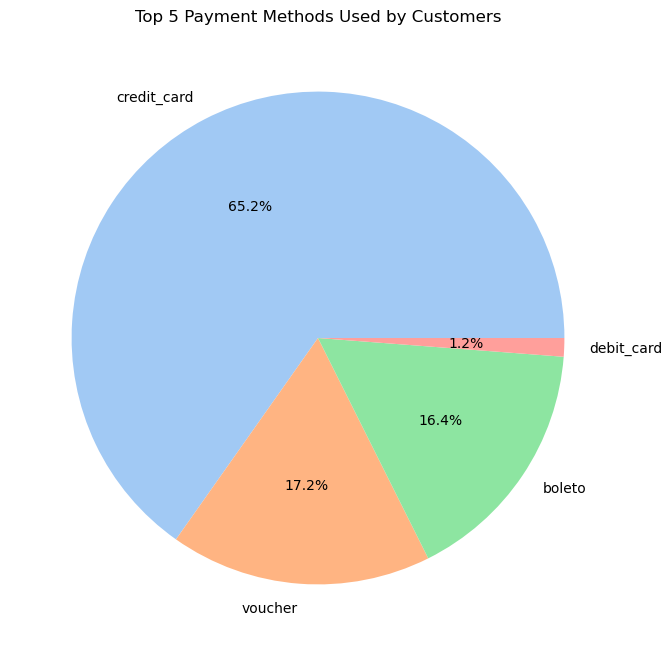

In [48]:
#  Top 5 Payment Methods Used by Customers
query = """
SELECT 
    dp.payment_type,
    COUNT(dp.order_id) AS total_transactions
FROM `data-warehouse-ecommerce.ecom.fact_orders` AS fo
JOIN `data-warehouse-ecommerce.ecom.staging_payments` AS dp
    ON fo.order_id = dp.order_id
GROUP BY dp.payment_type
ORDER BY total_transactions DESC
LIMIT 5;
"""

query_job = client.query(query)
df = query_job.to_dataframe()

# Displaying tabular output
print(df)

# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df["total_transactions"], labels=df["payment_type"], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Top 5 Payment Methods Used by Customers")
plt.show()


C:\anaconda\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


    purchase_hour  total_orders
0              16          7990
1              14          7896
2              11          7769
3              13          7671
4              15          7612
5              10          7325
6              17          7255
7              21          7249
8              20          7235
9              12          7185
10             19          6983
11             22          6923
12             18          6856
13              9          5644
14             23          4874
15              8          3501
16              0          2894
17              7          1419
18              1          1339
19              2           611
20              6           569
21              3           323
22              4           253
23              5           225


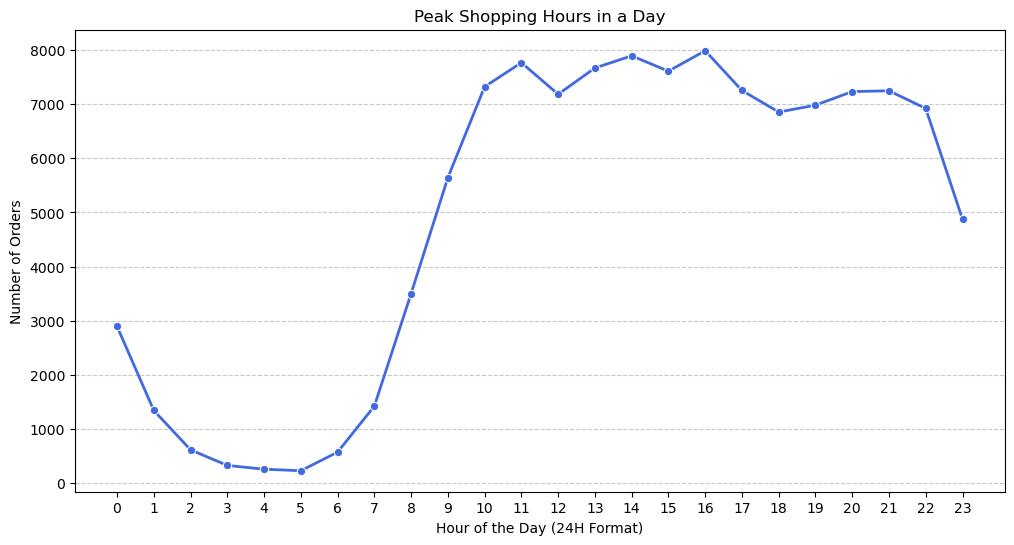

In [67]:
# Peak Shopping Hours in a Day
query = """
SELECT 
    EXTRACT(HOUR FROM PARSE_TIMESTAMP('%m/%d/%Y %H:%M', fo.order_purchase_timestamp)) AS purchase_hour,
    COUNT(fo.order_id) AS total_orders
FROM `data-warehouse-ecommerce.ecom.fact_orders` AS fo
GROUP BY purchase_hour
ORDER BY total_orders DESC;
"""
query_job = client.query(query)
df = query_job.to_dataframe()

# Displaying tabular output
print(df)

# Clean the data (convert to numeric and handle NaNs)
df['purchase_hour'] = pd.to_numeric(df['purchase_hour'], errors='coerce')
df['total_orders'] = pd.to_numeric(df['total_orders'], errors='coerce')

# Convert columns to standard int type
df['purchase_hour'] = df['purchase_hour'].astype('int')  # Ensure purchase_hour is an integer
df['total_orders'] = df['total_orders'].astype('int')  # Ensure total_orders is an integer
df = df.dropna(subset=['purchase_hour', 'total_orders'])

#  Visualization: Line Chart for Peak Hours
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["purchase_hour"], y=df["total_orders"], marker="o", color="royalblue", linewidth=2)

#  Add Labels & Titles
plt.xlabel("Hour of the Day (24H Format)")
plt.ylabel("Number of Orders")
plt.title("Peak Shopping Hours in a Day")
plt.xticks(range(0, 24))  # Show all hours from 0 to 23
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
